# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Objective :
The objective of this project is to develop a predictive model that can accurately estimate the price of used cars based on various features such as car make, model, year of manufacture, mileage, condition, and other relevant attributes. The model will be built using supervised machine learning algorithms, and performance will be evaluated using cross-validation to ensure generalizability and avoid overfitting.

# Key Steps :

*  Data Preprocessing and Exploration
    *  Explore data
    *  Clean the dataset
    *  Remove duplicates
    *  Handle missing data
    *  Check for outliers
    *  Handle ordinal and categorized data
    *  Scale data
*  Model Selection:
    *  Evaluate models such as Linear Regression, Ridge regression
*  Cross-Validation
    *  With the test data evaluate the performance of the model
*  Evaluation
    * Provide insights on the factors that allows maximizing the price for the used cars





### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Objectives :
Analyze the data for missing values. \
Analyze the data for outliers. \
Remove unwanted columns. \
Convert the fields to appropriate types. \

We have following observations on the data
*   VIN and ID columns are unique and does not help with analyzing prize
*   Price varies from 0 -3736928711
*   Odometer varies from 0 to 10000000.0
*   Size column has too many null : 306361



# Analyzing data in detail :

In [227]:
!pip install category_encoders

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import category_encoders as ce
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression

In [229]:
# Read the data set
usedCars = pd.read_csv('data/vehicles.csv')

In [230]:
# Take a first look at the data with info() describe() and  head() methods
usedCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [231]:
usedCars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [232]:
usedCars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


# 1) Analyze missing values.

In [233]:
# Analyze the null value percentage in columns
null_percentage = usedCars.isnull().mean() * 100
print(null_percentage)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


# 2) Drop unwanted columns

In [234]:

# Size column has 71% null values. Drop the column.
# Drop columns ID and VIN as they are completely unique.
usedCars = usedCars.drop(columns=['id', 'VIN','size'])



# 3) Convert columns to appropriate types




In [235]:
# Convert the types of columns to most appropriate
usedCars = usedCars.convert_dtypes()
print(usedCars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   price         426880 non-null  Int64 
 2   year          425675 non-null  Int64 
 3   manufacturer  409234 non-null  string
 4   model         421603 non-null  string
 5   condition     252776 non-null  string
 6   cylinders     249202 non-null  string
 7   fuel          423867 non-null  string
 8   odometer      422480 non-null  Int64 
 9   title_status  418638 non-null  string
 10  transmission  424324 non-null  string
 11  drive         296313 non-null  string
 12  type          334022 non-null  string
 13  paint_color   296677 non-null  string
 14  state         426880 non-null  string
dtypes: Int64(3), string(12)
memory usage: 50.1 MB
None


In [236]:
usedCars.describe(include = ['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,296313,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,3,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,131904,87056,79285,50614


# 4) Check for outliers


Text(0.5, 1.0, 'Year')

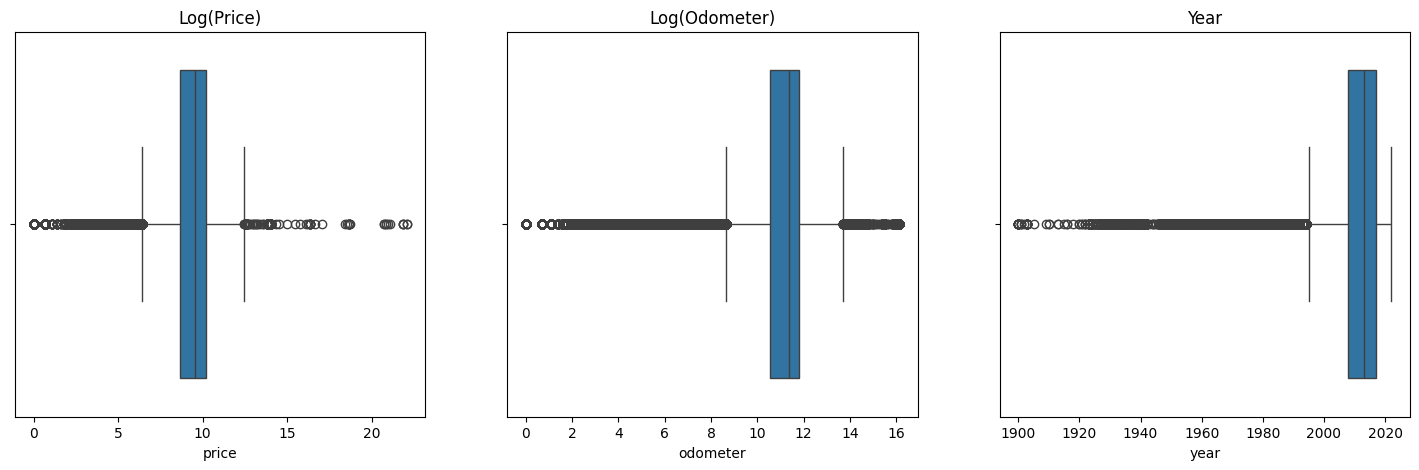

In [237]:

# Draw box plot to find outliers
plt.figure(figsize=(18, 5))

# Plot for log(price)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x=np.log1p(usedCars['price']))
plt.title("Log(Price)")

# Plot for log(odometer)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x=np.log1p(usedCars['odometer']))
plt.title("Log(Odometer)")

# Plot for log(year)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x=usedCars['year'])
plt.title("Year")

In [238]:
# Remove Outliers from price- Take only data between 25 -1.5 IQR  - 75 = 1.5 IQR percentile

#Price
Q1 = usedCars['price'].quantile(0.25)
Q3 = usedCars['price'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows that have outliers on price
usedCars = usedCars[(usedCars['price'] > (Q1 - 1.5 * IQR)) & (usedCars['price'] < (Q3 + 1.5 * IQR))]

# Remove the rows that has price as zero.
usedCars = usedCars[usedCars['price'] > 0]

usedCars.describe()

,price,year,odometer
count,385808.0,384828.0,383596.0
mean,17736.232976,2010.927583,99883.671621
std,12763.498592,9.544252,206870.716
min,1.0,1900.0,0.0
25%,6999.0,2008.0,39558.0
50%,14995.0,2013.0,88890.0
75%,26900.0,2017.0,136468.5
max,57341.0,2022.0,10000000.0


In [239]:

# Check the outliers with odometer
odometer_400 = usedCars[usedCars['odometer'] < 400000]

# There are 1415  rows with mileage greater than 400000
# Replace them with the mean of the odometer reading for year
usedCars.loc[usedCars['odometer'] > 400000, 'odometer'] = odometer_400.groupby('year')['odometer'].mean()
usedCars.describe()

,price,year,odometer
count,385808.0,384828.0,382150.0
mean,17736.232976,2010.927583,93284.983752
std,12763.498592,9.544252,63223.584986
min,1.0,1900.0,0.0
25%,6999.0,2008.0,39385.0
50%,14995.0,2013.0,88394.5
75%,26900.0,2017.0,135913.0
max,57341.0,2022.0,400000.0


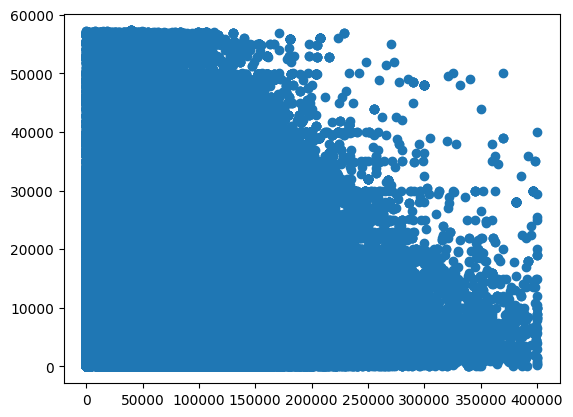

In [240]:
# odometer value increases price decreases
plt.scatter(usedCars['odometer'], usedCars['price'],  marker='o')

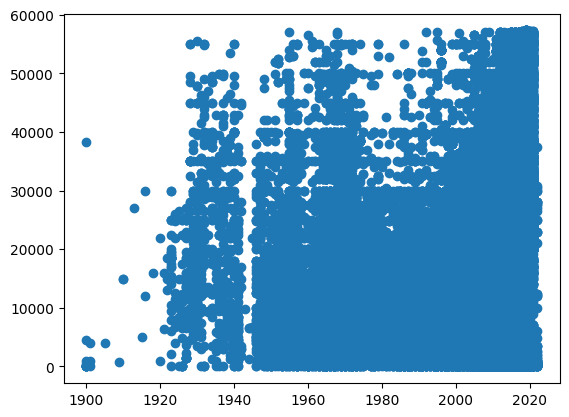

In [241]:
# year increases price increases
plt.scatter(usedCars['year'], usedCars['price'],  marker='o')


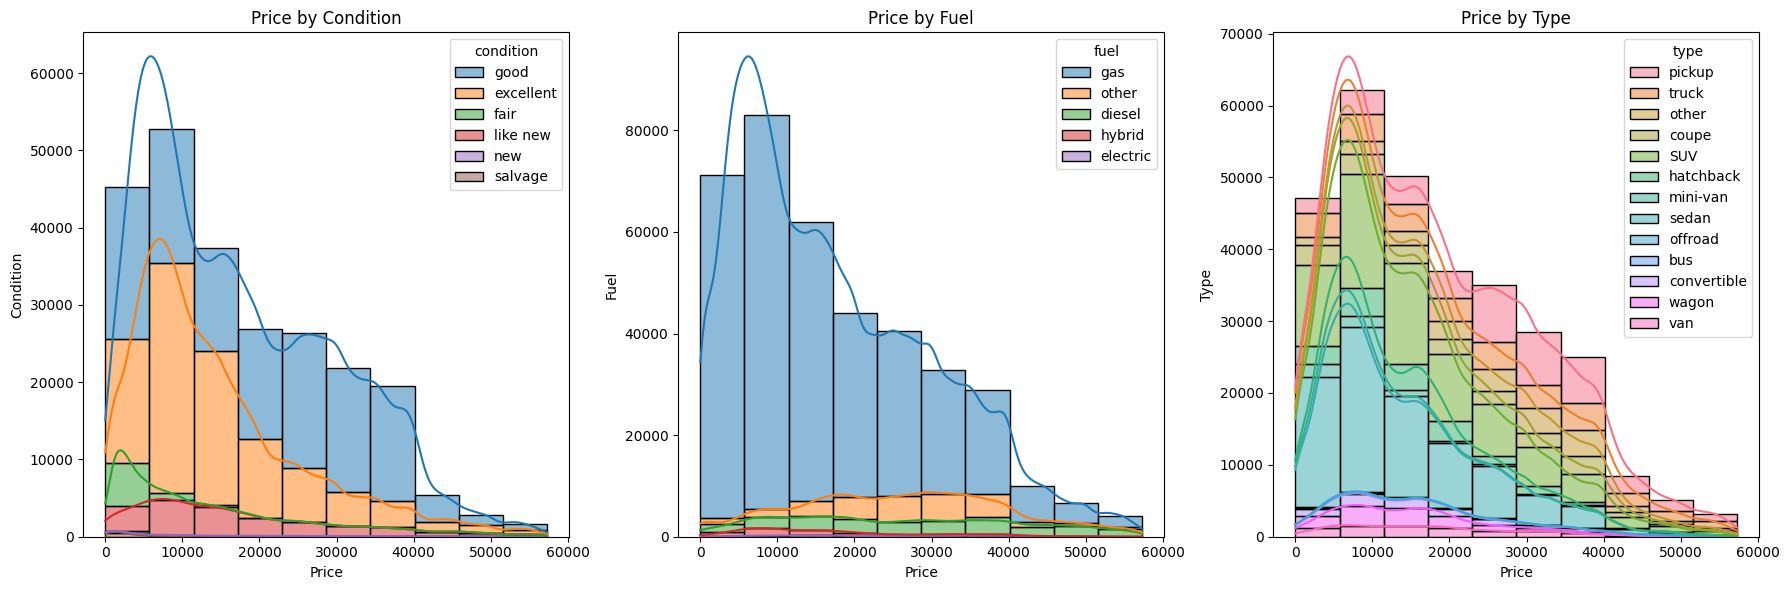

In [242]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1 - Histogram for Price and Condition
sns.histplot(data=usedCars, x='price', hue='condition', kde=True, multiple="stack", bins=10, ax=axes[0])
axes[0].set_title('Price by Condition')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Condition')

# Plot 2 - Histogram for Price and Fuel
sns.histplot(data=usedCars, x='price', hue='fuel', kde=True, multiple="stack", bins=10, ax=axes[1])
axes[1].set_title('Price by Fuel')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Fuel')

# Plot 3 - Histogram for Price and Type
sns.histplot(data=usedCars, x='price', hue='type', kde=True, multiple="stack", bins=10, ax=axes[2])
axes[2].set_title('Price by Type')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Type')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

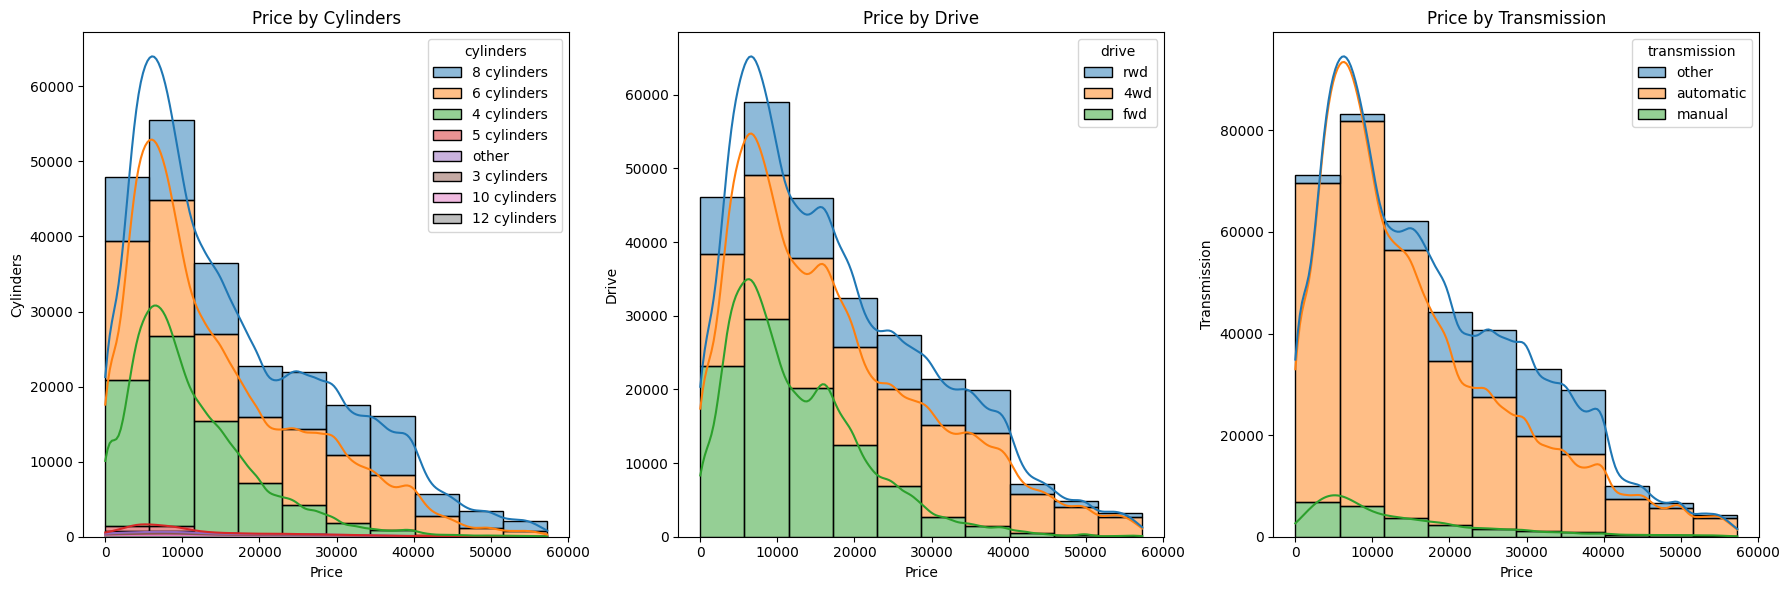

In [243]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1 - Histogram for Price and Cylinders
sns.histplot(data=usedCars, x='price', hue='cylinders', kde=True, multiple="stack", bins=10, ax=axes[0])
axes[0].set_title('Price by Cylinders')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Cylinders')

# Plot 2 - Histogram for Price and Drive
sns.histplot(data=usedCars, x='price', hue='drive', kde=True, multiple="stack", bins=10, ax=axes[1])
axes[1].set_title('Price by Drive')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Drive')

# Plot 3 - Histogram for Price and Transmission
sns.histplot(data=usedCars, x='price', hue='transmission', kde=True, multiple="stack", bins=10, ax=axes[2])
axes[2].set_title('Price by Transmission')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Transmission')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

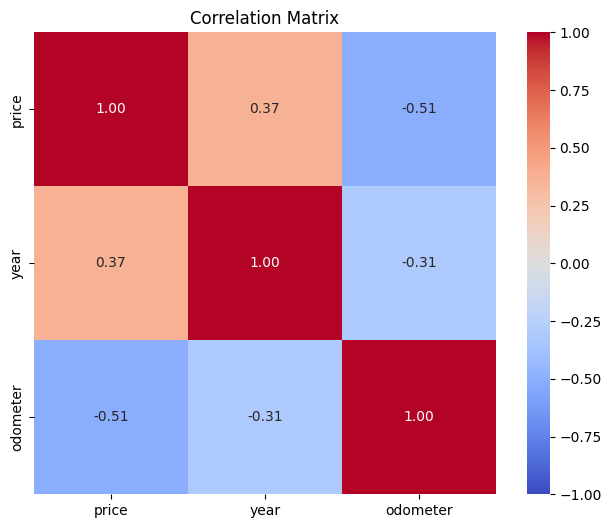

In [244]:
#usedCars[['model']]

correlation_matrix = usedCars.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# Objectives
We have 2 main objectives


*   Handle Missing data in category columns
*   Convert category ordinal columns to numeric columns

We will user **OneHotEncoder** , **OrdinalEncoder**, **James-Stein encoder** for preparing the data \

We habe to handle the following columns :
*   condition
*   cylinders
*   manufacturer
*   model
*   title_status
*   drive
*   type
*   paint_color
*   state
*   odometer




**1) Clean Condition Column**

In [245]:
# Clean condition column
# Replace with weights
condition_params = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'like new': 3,
    'excellent': 4,
    'new': 5,
    'unknown': -1  # missing data
}
usedCars['condition'] = usedCars['condition'].fillna('unknown')
usedCars['condition'] = usedCars['condition'].map(condition_params)

In [246]:
usedCars['condition'].value_counts()

,count
condition,
-1,146128
2,118450
4,93507
3,19419
1,6715
5,994
0,595


**2) Clean Cylinders Column**

In [247]:
### Clean cylinders column
# Replace with weights
cylinder_params = {
    '3 cylinders': 0,
    '4 cylinders': 1,
    '5 cylinders': 2,
    '6 cylinders': 3,
    '8 cylinders': 4,
    '10 cylinders': 5,
    '12 cylinders': 6,
    'other': 7,
    'unknown': -1  # For missing data
}
usedCars['cylinders'] = usedCars['cylinders'].fillna('unknown')
usedCars['cylinders'] = usedCars['cylinders'].map(cylinder_params)

In [248]:
usedCars['cylinders'].value_counts()


,count
cylinders,
-1,156495
3,87605
1,72941
4,64029
2,1667
5,1323
7,999
0,604
6,145


**3)Clean Paint color Column**

In [249]:
print(usedCars['paint_color'].value_counts(normalize=True) * 100)
print(usedCars['paint_color'].isnull().sum()/usedCars['paint_color'].count() * 100)
## We have 40% missing values in paint_color
## we will not consider this column in our analysis
usedCars = usedCars.drop(columns=['paint_color'])


paint_color
white     26.092617
black     20.994106
silver    14.640146
blue       10.72996
red       10.425318
grey       8.284711
green       2.58835
custom     2.332392
brown      2.263054
yellow     0.732837
orange     0.673089
purple     0.243418
Name: proportion, dtype: Float64
42.292116929386516


**4) Clean Drive Column**

In [250]:
print(usedCars['drive'].value_counts(normalize=True) * 100)
print(usedCars['drive'].isnull().sum()/usedCars['transmission'].count() * 100)
## We 31% missing and comparable values for 4wd fwd and rwd (39,38,21)
## we will not consider this column in our analysis
usedCars = usedCars.drop(columns=['drive'])
usedCars.shape

drive
4wd     43.30134
fwd    36.402454
rwd    20.296206
Name: proportion, dtype: Float64
30.818482913772094


(385808, 13)

In [251]:
# Split data to Test and Train. We need to make sure to not train the model on test data so that we can cross validate
X_train, X_test, y_train, y_test = train_test_split(usedCars.drop('price', axis=1), usedCars['price'], test_size=0.2, random_state=42)

**5) Clean Fuel Column**

In [252]:
usedCars['fuel'].value_counts(normalize=True) * 100


,proportion
fuel,
gas,85.30401
other,7.084206
diesel,5.938773
hybrid,1.266761
electric,0.406251


In [253]:
print(usedCars['fuel'].isnull().sum()/usedCars['fuel'].count()  * 100)
# 85 % is gas. Only 0.6% is missing. Lets replace with Gas]
X_train['fuel'] = X_train['fuel'].fillna('gas')
X_test['fuel'] = X_test['fuel'].fillna('gas')
print(usedCars['fuel'].isnull().sum())

#There are 5 distinct values. Using OneHotEncoder to encode fuel
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
title_fuel_encoded_train = encoder.fit_transform(X_train[['fuel']])
title_fuel_encoded_test = encoder.transform(X_test[['fuel']])

encoded_fuel_train = pd.DataFrame(title_fuel_encoded_train, columns=encoder.get_feature_names_out(['fuel']))
encoded_fuel_test = pd.DataFrame(title_fuel_encoded_test, columns=encoder.get_feature_names_out(['fuel']))

# Combine with the original dataframe
X_train = pd.concat([X_train.reset_index(drop=True), encoded_fuel_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_fuel_test.reset_index(drop=True)], axis=1)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


0.6645601822256896
2547


**6) Clean State Column**

In [254]:
print(usedCars['state'].isnull().sum())
#print the row with stat value null. Region is detroit metro. Set state to 'mi'
usedCars.loc[usedCars['state'].isnull(), 'state'] = 'mi'
X_train.loc[X_train['state'].isnull(), 'state'] = 'mi'
X_test.loc[X_test['state'].isnull(), 'state'] = 'mi'

# Large number of values. Apply James-stein encoding
encoder = ce.JamesSteinEncoder(cols=['state'])
encoder.fit(X_train[['state']], y_train)

# Transform the 'region' column
X_train['state'] = encoder.transform(X_train[['state']])
X_test['state'] = encoder.transform(X_test[['state']])

X_test = X_test.convert_dtypes()
X_train = X_train.convert_dtypes()

0


**7) Clean Region Column**

In [255]:
usedCars['region'].value_counts(normalize=True) * 100


,proportion
region,
columbus,0.87064
jacksonville,0.801694
omaha / council bluffs,0.759445
milwaukee,0.752965
new hampshire,0.751669
...,...
meridian,0.005184
southwest MS,0.00311
kansas city,0.002592


In [256]:
# There is large number of unique values in region
def clean_method(input_str):
    input_str = input_str.lower().strip()  # Convert to lowercase and strip spaces
    input_str = re.sub(r"[/,\-']", " ", input_str)  # Remove special characters
    input_str = re.sub(r"\s+", "_", input_str)  # Replace spaces with underscores
    return input_str

# Apply cleaning function to the column
X_train['region'] = X_train['region'].apply(clean_method)
X_test['region'] = X_test['region'].apply(clean_method)

# Apply James-stein encoding
encoder = ce.JamesSteinEncoder(cols=['region'])
encoder.fit(X_train[['region']], y_train)

# Transform the 'region' column
X_train['region_encoded'] = encoder.transform(X_train[['region']])
X_test['region_encoded'] = encoder.transform(X_test[['region']])

X_test = X_test.convert_dtypes()
X_train = X_train.convert_dtypes()

**8) Clean Title status Column**

In [257]:

# There are 3726 null values. Setting them to unknown
X_train['title_status'] = X_train['title_status'].fillna('unknown')
X_test['title_status'] = X_test['title_status'].fillna('unknown')

#There are 7 distinct values. Using OneHotEncoder to encode title_status
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
title_status_encoded_train = encoder.fit_transform(X_train[['title_status']])
title_status_encoded_test = encoder.transform(X_test[['title_status']])

encoded_title_train = pd.DataFrame(title_status_encoded_train, columns=encoder.get_feature_names_out(['title_status']))
encoded_title_test = pd.DataFrame(title_status_encoded_test, columns=encoder.get_feature_names_out(['title_status']))

# Combine with the original dataframe
X_train = pd.concat([X_train.reset_index(drop=True), encoded_title_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_title_test.reset_index(drop=True)], axis=1)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


**9) Clean *Transmission* Column**

In [258]:
print(usedCars['transmission'].value_counts(normalize=True) * 100)
print(usedCars['transmission'].isnull().sum()/usedCars['transmission'].count() * 100)

# .4% of null values and 77% automatic.
# Set the unknown values to automatic
X_train['transmission'] = X_train['transmission'].fillna('automatic')
X_test['transmission'] = X_test['transmission'].fillna('automatic')

# Use One hot encoder to encode transmission column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
transmission_encoded_train = encoder.fit_transform(X_train[['transmission']])
transmission_encoded_test = encoder.transform(X_test[['transmission']])

encoded_trans_train = pd.DataFrame(transmission_encoded_train, columns=encoder.get_feature_names_out(['transmission']))
encoded_trans_test = pd.DataFrame(transmission_encoded_test, columns=encoder.get_feature_names_out(['transmission']))

# Combine with the original dataframe
X_train = pd.concat([X_train.reset_index(drop=True), encoded_trans_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_trans_test.reset_index(drop=True)], axis=1)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



transmission
automatic    77.988397
other        15.935863
manual         6.07574
Name: proportion, dtype: Float64
0.4572297501380021


**10) Clean Type Column**

In [259]:
print(usedCars['type'].value_counts(normalize=True) * 100)
print(usedCars['type'].isnull().sum()/usedCars['transmission'].count() * 100)
# There is 21% null values in type column
# fill null with others
usedCars['type'] = usedCars['type'].fillna('other')
X_train['type'] = X_train['type'].fillna('other')
X_test['type'] = X_test['type'].fillna('other')

# Apply James-stein encoding
encoder = ce.JamesSteinEncoder(cols=['type'])
encoder.fit(X_train[['type']], y_train)

# Transform
X_train['type_encoded'] = encoder.transform(X_train[['type']])
X_test['type_encoded'] = encoder.transform(X_test[['type']])

X_test = X_test.convert_dtypes()
X_train = X_train.convert_dtypes()

type
sedan          26.536017
SUV            23.162497
pickup         13.158619
truck           9.504994
other           6.372794
coupe           5.848054
hatchback       5.272596
wagon           3.327444
van             2.588564
convertible     2.363486
mini-van        1.505935
offroad          0.19425
bus             0.164748
Name: proportion, dtype: Float64
21.907189651401374


In [260]:
X_test = X_test.convert_dtypes()
X_train = X_train.convert_dtypes()

**11) Clean Manufacturer Column**




In [261]:

usedCars['manufacturer'].isnull().sum()/usedCars['manufacturer'].count() * 100
# There is 4% missing values
# fill with unknown
usedCars['manufacturer'] = usedCars['manufacturer'].fillna('unknown')
X_train['manufacturer'] = X_train['manufacturer'].fillna('unknown')
X_test['manufacturer'] = X_test['manufacturer'].fillna('unknown')

# Use James - stein encoding
encoder = ce.JamesSteinEncoder(cols=['manufacturer'])
encoder.fit(X_train[['manufacturer']],y_train)

# Transform
X_train['manufacturer_encoded'] = encoder.transform(X_train[['manufacturer']])
X_test['manufacturer_encoded'] = encoder.transform(X_test[['manufacturer']])

X_test = X_test.convert_dtypes()
X_train = X_train.convert_dtypes()

**12) Clean Model Column**


In [262]:
# For this analysis remove model column. Its slightly too complex. Remove, encoded parent columns as well.

In [263]:
X_train.drop(columns=['region','fuel','title_status','transmission','type','manufacturer','model'], inplace=True)
X_test.drop(columns=['region','fuel','title_status','transmission','type','manufacturer','model'], inplace=True)
usedCars.drop(columns=['region','fuel','title_status','transmission','type','manufacturer','model'], inplace=True)

**13) Clean Price Column** -- Already done

**14) Clean Year column**

In [264]:
#set missing year to mean year
X_train.fillna(2018, inplace=True)
X_test.fillna(2018, inplace=True)

**15) Clean Odometer Column**


In [265]:

# Set null values to mean of odometer value grouped by year
mean_odometer_train = X_train.groupby('year')['odometer'].transform('mean')
mean_odometer_test = X_test.groupby('year')['odometer'].transform('mean')


print(mean_odometer_train)
X_train['odometer'].fillna(mean_odometer_train, inplace=True)
X_test['odometer'].fillna(mean_odometer_test, inplace=True)

0          24183.169115
1         120005.153283
2          36901.536596
3          24183.169115
4         137880.279165
              ...      
308641          64394.5
308642     24183.169115
308643    130812.978284
308644    153501.351175
308645     68466.951966
Name: odometer, Length: 308646, dtype: Float64


<ipython-input-265-22ba2408f8c7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['odometer'].fillna(mean_odometer_train, inplace=True)
<ipython-input-265-22ba2408f8c7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

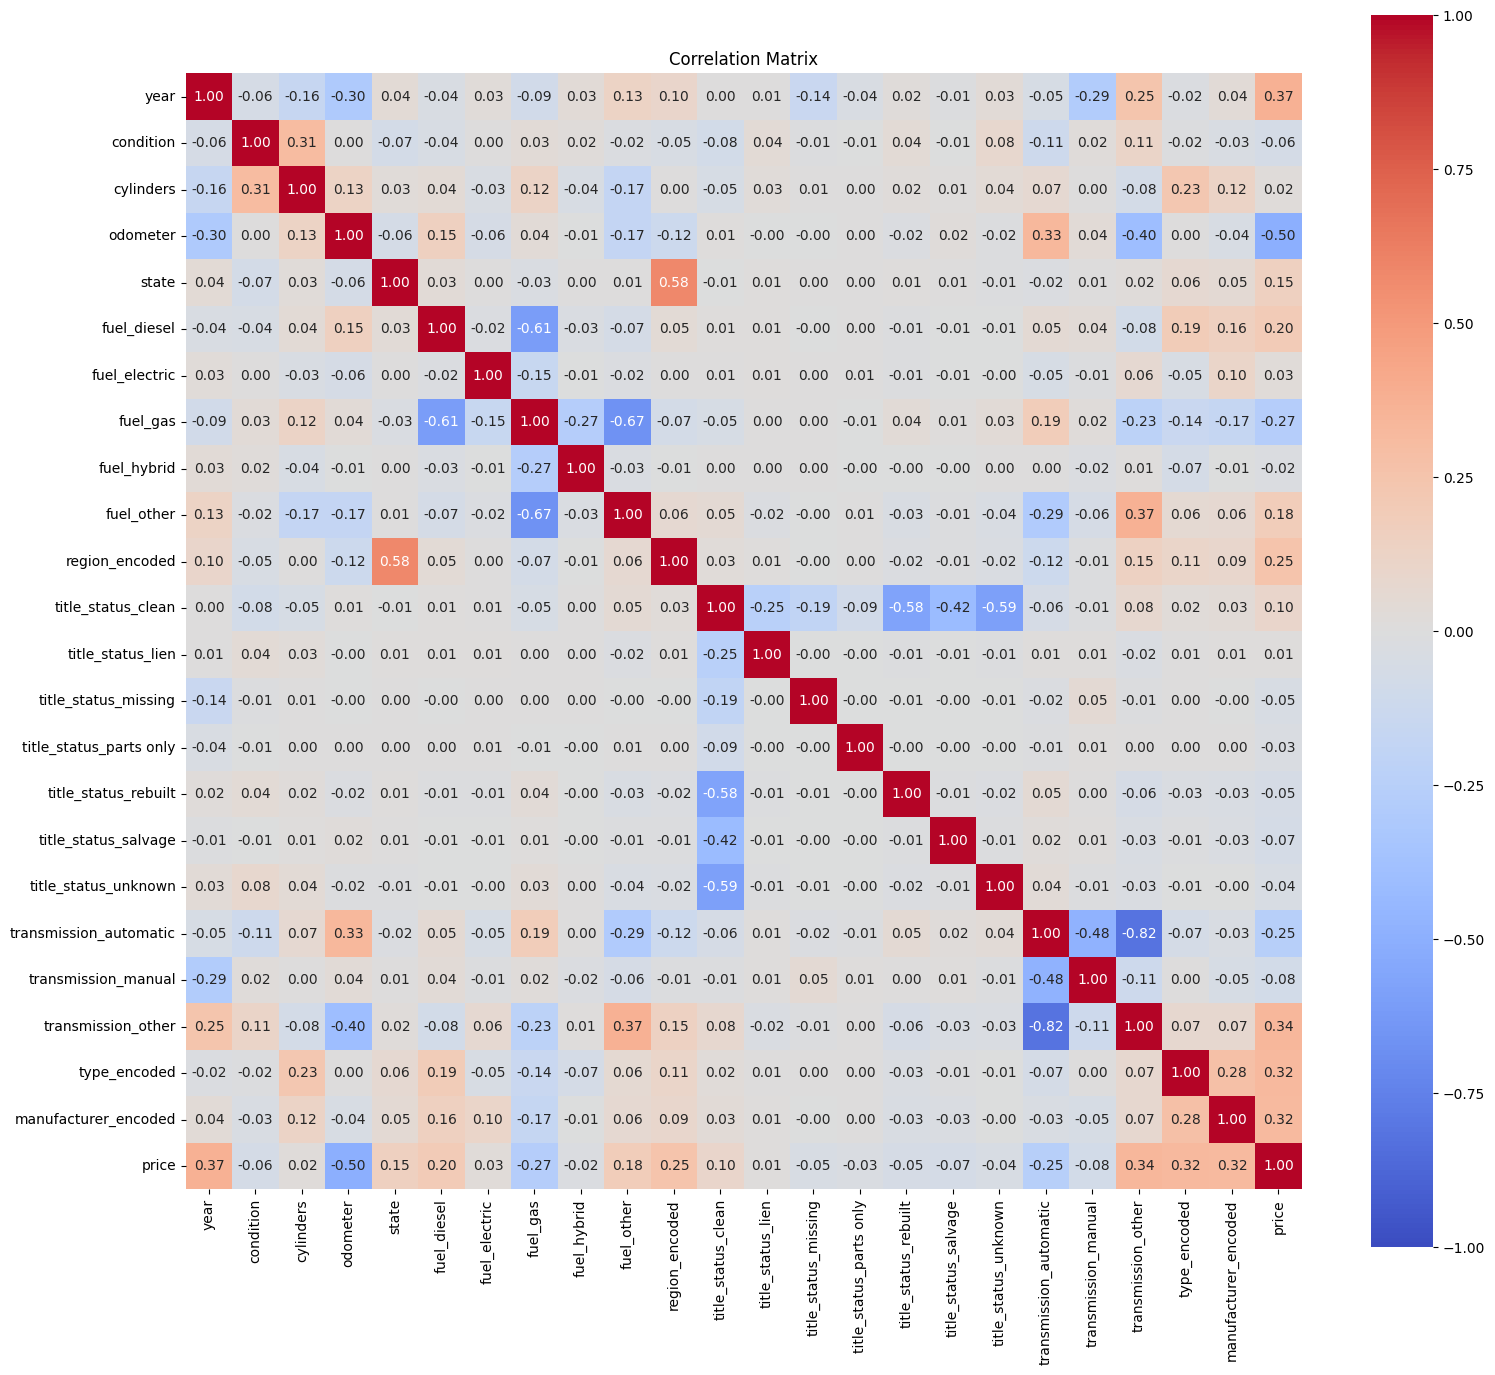

In [266]:
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix')
plt.show()
# Plot a corr() for X_train and y_train
#

In [274]:
# Linear regresssion model
pipe_linear = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipe_linear.fit(X_train, y_train)
preds_linear = pipe_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, preds_linear)
print(mse_linear)

r2_test_linear = r2_score(y_test, preds_linear)
print(r2_test_linear)

60856811.91417967
0.627762872803088


In [268]:
# Extract coefficients from the Linear regression model
# Extract the polynomial features
poly_features = pipe_linear.named_steps['poly'].get_feature_names_out(input_features=X_train.columns)

# Extract the coefficients from the trained linear model
coefficients = pipe_linear.named_steps['model'].coef_

# Combine feature names and their corresponding coefficients into a DataFrame
features_and_coefficients = pd.DataFrame({
    'Feature': poly_features,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of coefficients in descending order and get top 20
top_20_features_and_coefficients = features_and_coefficients.reindex(
    features_and_coefficients['Coefficient'].abs().sort_values(ascending=False).index
).head(20)

# Print the top 20 features with the maximum absolute coefficients
print(top_20_features_and_coefficients)

                        Feature    Coefficient
0                          year -487337.215192
23                       year^2  480804.392021
26                year odometer -176878.032949
45    year manufacturer_encoded  174529.227391
28             year fuel_diesel  134388.700076
22         manufacturer_encoded -130825.348567
44            year type_encoded  112254.118398
24               year condition -105478.890933
25               year cylinders   97119.280162
31             year fuel_hybrid   93439.745728
33          year region_encoded   92152.686037
43      year transmission_other   88858.667645
21                 type_encoded  -84606.940159
40    year title_status_unknown  -80635.002014
30                year fuel_gas  -76532.499057
10               region_encoded  -75938.945762
32              year fuel_other  -71975.989668
41  year transmission_automatic  -62205.823188
3                      odometer   58449.196218
97  odometer title_status_clean   49399.278465


In [269]:
# Ridge Regression model
# Find alpha
param_grid = {
    'alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]  # Range of alpha values to try
}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid,cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(best_model) # alpha=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.95595e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.9246e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.94848e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.95299e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning

Ridge(alpha=10.0)


In [273]:

params_to_try = [0.01, 0.1, 1, 10, 100]
pipe_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=10))
])

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, preds_ridge)
print(mse_ridge)

r2_test_ridge = r2_score(y_test, preds_ridge)
print(r2_test_ridge)

64721814.32004122
0.6041221767673524


In [271]:
# Extract coefficients from the Ridge model
# Extract the polynomial features
poly_features = pipe_ridge.named_steps['poly'].get_feature_names_out(input_features=X_train.columns)

# Extract the coefficients from the trained linear model
coefficients = pipe_ridge.named_steps['model'].coef_

# Combine feature names and their corresponding coefficients into a DataFrame
features_and_coefficients = pd.DataFrame({
    'Feature': poly_features,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of coefficients in descending order and get top 20
top_20_features_and_coefficients = features_and_coefficients.reindex(
    features_and_coefficients['Coefficient'].abs().sort_values(ascending=False).index
).head(20)

# Print the top 20 features with the maximum absolute coefficients
print(top_20_features_and_coefficients)

                                Feature    Coefficient
23                               year^2  139355.186496
0                                  year -138760.529790
28                     year fuel_diesel   49149.316088
42             year transmission_manual  -45712.337769
30                        year fuel_gas  -36592.410267
45            year manufacturer_encoded   33363.928172
44                    year type_encoded   28860.445472
22                 manufacturer_encoded  -23326.885198
24                       year condition  -21810.767671
21                         type_encoded  -20270.434741
33                  year region_encoded   19242.737937
43              year transmission_other   16367.360357
36            year title_status_missing  -14321.254297
128                       fuel_diesel^2  -13674.446480
5                           fuel_diesel  -13674.446479
141  fuel_diesel transmission_automatic  -13505.684943
134      fuel_diesel title_status_clean  -13267.057265
10        

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Introduction:

The goal of this analysis was to predict the price of used cars based on various features available in the dataset. The dataset contains features such as year, mileage, and other relevant characteristics of the cars. Our primary focus was to evaluate how different factors impact the price of used cars and assess the performance of linear and ridge regression models in predicting car prices.

# Data Preparation and Preprocessing:

Data Exploration:**

*   Explored data : Analysed and explored the data set and tried to understand the
domain and business usecase.
*   Analyze Missing Values: Identified missing values in the odometer column, which were replaced by the mean odometer reading for each car year. We also checked for other missing values across the dataset and dropped irrelevant columns (id, VIN, size) that contained excessive missing data or were non-predictive.
*   Converted Columns to Appropriate Types: Convert object etc types to appropriate type
*   Handled missing data : Applied multiple ways to handle missing data. State utilized region data for missing value. Ordinal fields like condition/cylinders were set with 'unknown' tag for null values. Columns with large amount of missing date were dropped from analysis. Transmission column had 77% automatic value, this was set to null as well. For missing odometer, the mean of the mileage from corresponding year was used.
*   Check for Outliers: To detect outliers, visualized key features (price, odometer, year) using box plots. Outliers were identified as values that fell outside the typical range, such as unusually high prices or mileage. Q1-1.5 IQR --- Q3+1.5 IQR was applied on price column to exclude outliers. These preprocessing steps ensured the dataset was clean, with missing values and outliers appropriately handled, making it ready for model building.
*    Feature Engineering and Encoding: Categorical Encoding: Used One-Hot Encoding and James-Stein encoding to encode categorical values to numerical columns. Ordinal fields like conditions, cylinders were encoded with 1,2,3,4.
*    Scale data : Used StandardScalar() for scaling the data

# Model Building:

Created two models to predict the price of used cars:

*    Linear Regression: A linear regression model was created to predict car prices using all the features. The linear regression algorithm assumes a linear relationship between the input features and the target price. The model was trained and evaluated using cross-validation to ensure a robust assessment.
*    Ridge Regression: To address potential multicollinearity issues (where features might be correlated with each other), we used Ridge Regression. This model applies L2 regularization to prevent overfitting by shrinking the coefficients of correlated features. We performed hyperparameter tuning using GridSearchCV to find the optimal value of alpha, which controls the strength of the regularization.
The models were evaluated using various metrics, including the Mean Squared Error (MSE) and R-squared (R²). Here's a summary of the performance evaluation:

**Linear Regression Model:** MSE (Mean Squared Error): The MSE was calculated to measure the average squared difference between the observed actual outcomes and the model's predictions. R² (R-squared): The R² score tells us how well the model explains the variance in the data. A higher R² value indicates a better fit of the model to the data. \
MSE = 60856811.91417967 \
R² = 62.776 \
**Ridge Regression Model:** MSE and R²: After tuning the alpha hyperparameter using GridSearchCV, the Ridge regression model performed similarly to the linear regression model but with a slightly better ability to generalize to unseen data due to the regularization effect. The optimal value of alpha was found to be around 10, indicating a good balance between fitting the data and controlling overfitting. \
MSE = 64721814.32004122 \
R² = 60.41

These models can be used to predict the price for a new car with given features.

# Key Insights:

*    Observed a positive correlation between the year and price: As the year of a car increases, so does its price. This suggests that newer cars generally have a higher value compared to older cars.
*    Noticed a negative correlation between mileage and price: As the mileage (or odometer reading) increases, the price of the car tends to decrease. This aligns with the intuition that cars with more miles driven are generally worth less.
*    Cars in better condition has higher demand
*    Clean title status has high demand among customers than others
*    Type of car sedan/suv also impacts the price of the car

# Conclusion:

Based on the analysis and model evaluations, the following conclusions can be drawn:

*    The relationship between year and price, as well as between mileage and price, is consistent with real-world intuition and is well captured by both the linear and ridge regression models.
*    Similar key insigts were drawn on mileage, condition , title_status, type etc to affect the price of the car
*    While both models performed well, the Linear regression model provided slightly better results, making it more robust for this dataset.
*    The model could be used to predict plausible selling price for a car
*    Future improvements could involve exploring additional features (model) and experimenting with other regression models, such as Lasso or ElasticNet, which might offer further enhancements in predictive performance.
Recommendations for Further Analysis:

Feature Expansion:
*    Incorporating additional features such as the car model, could improve the predictive power of the models.
*    Better Preparation: We could involve better handling for null values with more advanced techniques which could improve the overall quality of the data set.
*    Model Refinement: Experimenting with more advanced machine learning algorithms, such as decision trees or ensemble methods (Random Forest, Gradient Boosting), could provide a more complex and potentially higher-performing model.
*    Outlier Detection: Further analysis on outliers in car prices and mileage could help improve model accuracy, as extreme values could skew predictions.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.